### What is Multi Dimensional Scaling?

In Multidimensional scaling (MDS), the goal of the analysis is to detect meaningful underlying dimensions that allow the researcher to explain observed similarities or dissimilarities (distances) between the investigated objects.

### MDS Approach
1. MDS is a way to "rearrange" objects in an efficient manner, so as to arrive at a configuration that best approximates the observed distances. 
2. It actually moves objects around in the space defined by the requested number of dimensions, and checks how well the distances between objects can be reproduced by the new configuration. In more technical terms, it uses a function minimization algorithm that evaluates different configurations with the goal of maximizing the goodness-of-fit (or minimizing "lack of fit").
3. During the process it will learn N X K parameters where N is the number of dimensions in original space and K is the Vector representing the data in higher dimensional projectd space.

### MDS as Manifold Learning

#### Issues with PCA
Principal Component Analysis (PCA) can be used in the dimensionality reduction task—reducing the number of features of a dataset 
    * It maintains the relationships between the points.
    * While PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data
    
#### Manifold Learning as Solution
To address this deficiency, we can turn to a class of methods known as manifold learning—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces.

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from time import time
from sklearn import manifold
from sklearn import datasets
from sklearn import decomposition
from sklearn import ensemble
from sklearn import random_projection
from sklearn import discriminant_analysis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

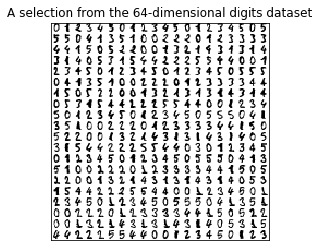

In [3]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()

In [4]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
  
    pl.figure()
    pl.figure(figsize=(8,8))
    ax = pl.subplot(111)
    for i in range(X.shape[0]):
        pl.text(X[i, 0], X[i, 1], str(digits.target[i]),
                color=pl.cm.Set1(y[i] / 10.),
                fontdict={'weight': 'bold', 'size': 9})
  
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=pl.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    pl.xticks([]), pl.yticks([])
    if title is not None:
        pl.title(title)
    pl.show()

Computing PCA projection


<Figure size 432x288 with 0 Axes>

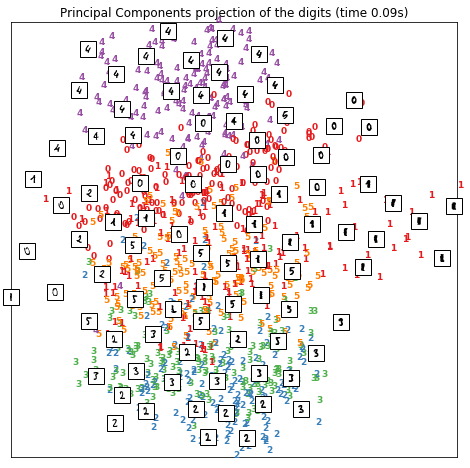

In [5]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

Computing MDS embedding
Done. Stress: 142250835.654551


<Figure size 432x288 with 0 Axes>

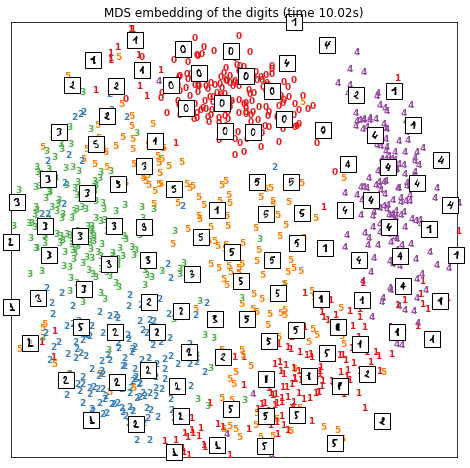

In [6]:
#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

Computing Linear Discriminant Analysis projection


<Figure size 432x288 with 0 Axes>

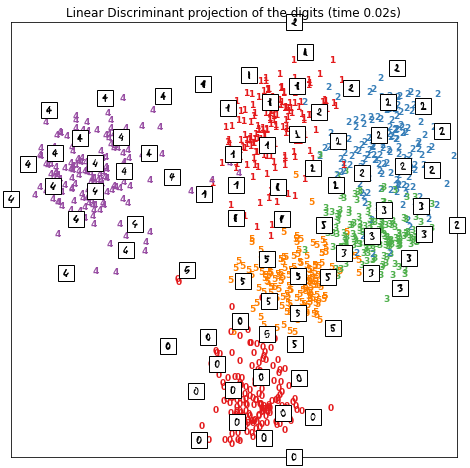

In [7]:
#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))